# TAREA 2 ASTROFÍSICA EXTRAGALÁCTICA

- Nombre: Marcelo Nicolás Ojeda Cárdenas

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
from astropy.io.votable import parse
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from astropy.convolution import convolve, Gaussian1DKernel
from scipy.optimize import curve_fit

In [5]:
plt.rcParams.update({
    'text.usetex': False,
    'text.latex.preamble': r'\usepackage{amsmath}',
    'font.family': 'serif',
    'font.weight': 'normal',
    'figure.facecolor': 'white',
    'mathtext.fontset': 'dejavuserif'
})

## Pregunta 1: Escala de altura del disco de la Galaxia

### a)

La tabla proporcionada es un archivo con extensión ```.vot```. Abriremos esta tabla con el módulo ```votable``` de astropy, y la abriremos como un dataframe de Pandas.

In [6]:
table_path = '1715657717558O-result.vot'

votable = parse(table_path)

table = votable.get_first_table().to_table()

gaia_data = table.to_pandas()
gaia_data

,SOURCE_ID,ra,dec,phot_g_mean_mag,bp_rp,parallax,pmra,pmdec,radial_velocity,mh_gspspec
0,5459877261220464512,149.706117,-32.683039,13.933306,1.264465,0.234490,-5.689235,0.793420,79.242012,NaN
1,5459233389783747968,152.379091,-33.015255,11.911551,1.416827,0.557544,2.866809,0.745181,16.321693,-0.30
2,5460192099502918656,151.864369,-31.422032,13.724075,1.362687,0.264207,-5.263114,0.165210,53.045547,NaN
3,5463677340905512960,151.169361,-29.876994,11.297482,1.363467,0.951489,-0.551430,-3.419740,32.012726,-0.13
4,5462669230478657152,153.796618,-28.619555,13.261548,1.241774,0.336540,-10.312181,0.154927,35.998482,NaN
...,...,...,...,...,...,...,...,...,...,...
37629,4251824972391999744,281.151098,-8.266800,15.022455,2.136995,0.244185,-2.900612,-5.424893,-17.687220,NaN
37630,4251846923862377856,281.229228,-8.051804,14.237474,2.393588,0.230136,3.138608,-5.762636,68.105782,NaN
37631,4251808788958515584,280.266640,-8.067632,13.986049,1.772787,0.340971,-1.100493,-4.181602,51.742645,NaN
37632,4251831187105723264,281.414609,-8.098100,14.761138,2.032878,0.219790,-3.529564,-6.251818,81.449219,NaN


In [7]:
print(gaia_data.columns)

Index(['SOURCE_ID', 'ra', 'dec', 'phot_g_mean_mag', 'bp_rp', 'parallax',
       'pmra', 'pmdec', 'radial_velocity', 'mh_gspspec'],
      dtype='object')


Las columnas presentes en este dataframe son las siguientes:

- De *gaiadr3.gaia_source*: 

    - **SOURCE_ID**: Contiene las id de cada fuente. Cada una de las id es única para cada fuente, y se obtiene codificando la posición aproximada de la fuente a través de un algoritmo.

    - **ra**: Contiene las coordenadas en ascención recta de las fuentes, en sistema ICRS. Tiene unidades angulares $\text{deg}$.

    - **dec**: Contiene las coordenadas en declinación de las fuentes, en sistema ICRS. Tiene unidades angulares $\text{deg}$.

    - **phot_g_mean_mag**: Contiene la magnitud promedio en la banda G de las fuentes. Esta magnitud es aparente, y está corregida con el zeropoint de la escala Vega. Tiene unidades de magnitud $\text{mag}$.

    - **bp_rp**: Contiene los datos de color BP - RP (la razón flujos entre la banda azul y roja de GAIA). Tiene unidades de magnitud $\text{mag}$.

    - **parallax**: Contiene el paralaje absoluto de las fuentes. Tiene unidades angulares $\text{mas}$ (miliarcosegundo).

    - **pmra**: Contiene los datos de movimiento propio de las fuentes en la coordenada ascención recta. Tiene unidades de velocidad angular $\text{mas}\hspace{1mm}\text{yr}^{-1}$ (miliarcosegundos por año).

    - **pmdec**: Contiene los datos de movimiento propio de las fuentes en la coordenada declinación. Tiene unidades de velocidad angular $\text{mas}\hspace{1mm}\text{yr}^{-1}$ (miliarcosegundos por año).

    - **radial velocity**: Contiene los datos de velocidad radial espectroscópica calculada desde el marco de referencia del baricentro del sistema solar. El baricentro del sistema solar es el punto en el que todos los objetos del sistema solar orbitan alrededor debido a la interacción gravitatoria. Tiene unidades de velocidad $\text{km}\hspace{1mm}\text{s}^{-1}$.

- De *gaiadr3_astrophysical_parameters*:
    
    - **mh_gspspec**: Contiene los datos de metalicidad global de cada fuente, de la forma [$\text{M/H}$] (razón entre la abundancias de elementos más pesados con la abundancia de hidrógeno). Tiene unidades de $\text{Dex}$, que significa exponente decimal, que nace de la definición de esta metalicidad, ya que está dada por un logaritmo en base 10. Una estrella con $\text{Dex}$ positivo tiene mayor metalicidad que el Sol, y una estrella con menor metalicidad que el Sol tendrá un $\text{Dex}$ negativo.

### b)

Primero haremos un gráfico de RA vs DEC, para observar el campo con el que estamos trabajando.

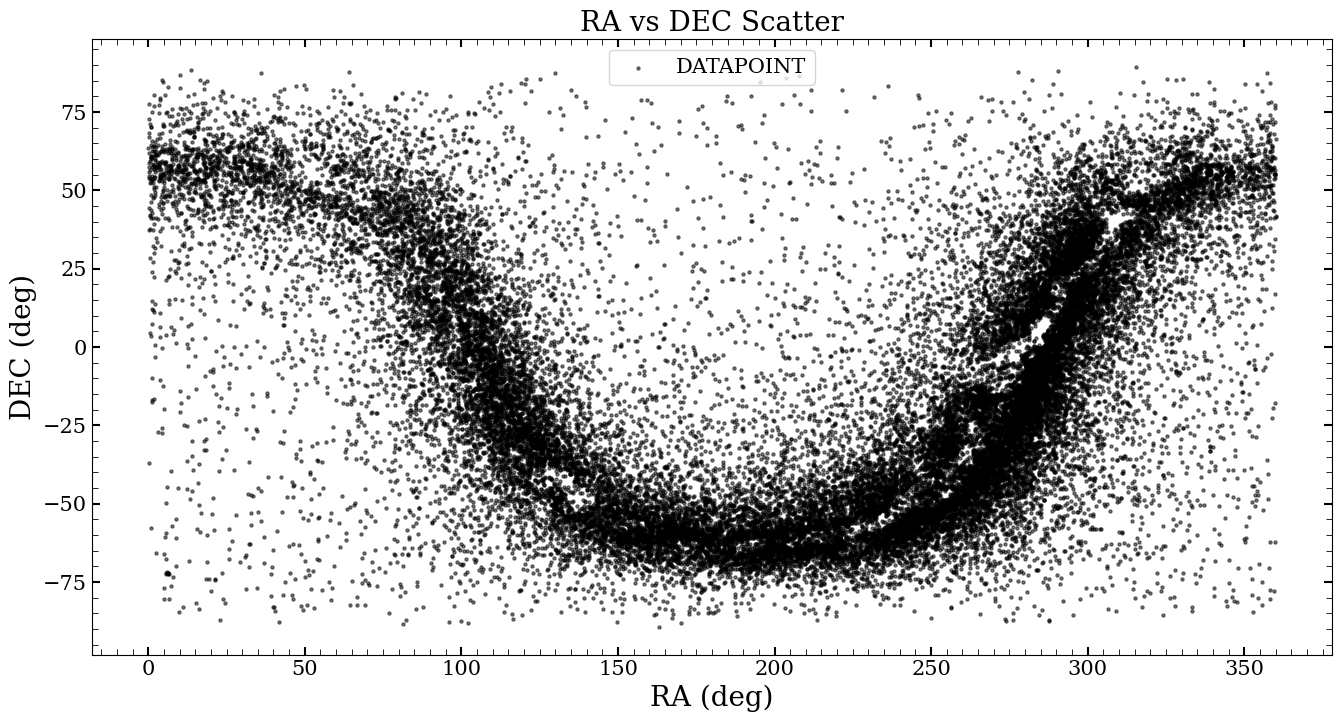

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(gaia_data['ra'], gaia_data['dec'], label=r'DATAPOINT', s=5, color='black', alpha=0.5)

ax.set_ylabel(r'DEC (deg)', fontsize=20)
ax.set_xlabel(r"RA (deg)", fontsize=20)
ax.set_title(r'RA vs DEC Scatter', fontsize=20)


ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)

Con este gráfico nos damos cuenta inmediatamente que los datos con los que estamos trabajando corresponden a objetos en la Vía Láctea.

Haremos histogramas del resto de parámetros para estudiar la muestra.

In [9]:
# Definiremos estas funciones para fittear gaussianas a los datos
# me quedó bonita, no olvidar guardar para usarla en el futuro owo

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

def gaussian_fit(data, bin_count, sigma=0.5):

    # Eliminamos los NaNs
    try:
        data = data.dropna()
    except AttributeError:
        pass

    # Calculamos el histograma usando el número de bins
    hist, bin_edges = np.histogram(data, bins=bin_count, density=False)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Utilizar un kernel Gaussiano para convolucionar el histograma y suavizarlo
    gaussian_kernel = Gaussian1DKernel(stddev=sigma)  # Elegimos sigma 0.5, arbitrario
    smoothed_hist = convolve(hist, gaussian_kernel)
    
    # Calculamos el promedio ponderado y la desviación estándar para el histograma
    weighted_mean = np.sum(bin_centers * hist) / np.sum(hist)
    weighted_std = np.sqrt(np.sum(hist * (bin_centers - weighted_mean) ** 2) / np.sum(hist))

    # Usamos estos valores como priors
    initial_guess = [max(hist), weighted_mean, weighted_std]

    # Hacemos el ajuste utilizando curve_fit
    params, _ = curve_fit(gaussian, bin_centers, smoothed_hist, p0=initial_guess)

    return params

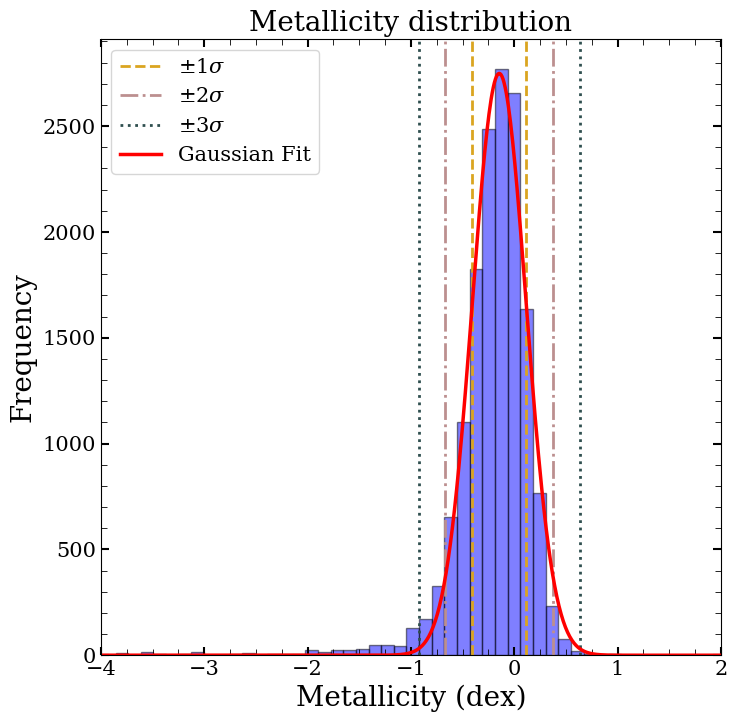

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(gaia_data['mh_gspspec'], bins=50, color='blue', alpha=0.5, edgecolor='black')

params = gaussian_fit(gaia_data['mh_gspspec'], 50)

sigma = params[2]
ax.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

ax.set_ylabel(r'Frequency', fontsize=20)
ax.set_xlabel(r"Metallicity (dex)", fontsize=20)
ax.set_title(r'Metallicity distribution', fontsize=20)

ax.set_xlim(-4, 2)

ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)

De la distribución de metalicidad, notamos que en general la distribución tiene un skewness hacia los valores negativos, es decir, en general nuestra muestra tiende a tener metalicidades más bajas que la del Sol. Esto puede deberse a que, siendo la Vía Láctea una galaxia espiral con alta formación estelar, hay una mayor abundancia de estrellas jóvenes de hidrógeno. En comparación, una galaxia que ya no puede presentar episodios de formación estelar debería presentar estrellas muy metálicas. Además, la tendencia a metalicidades negativas apunta a que estamos observando una muestra del disco galáctico.

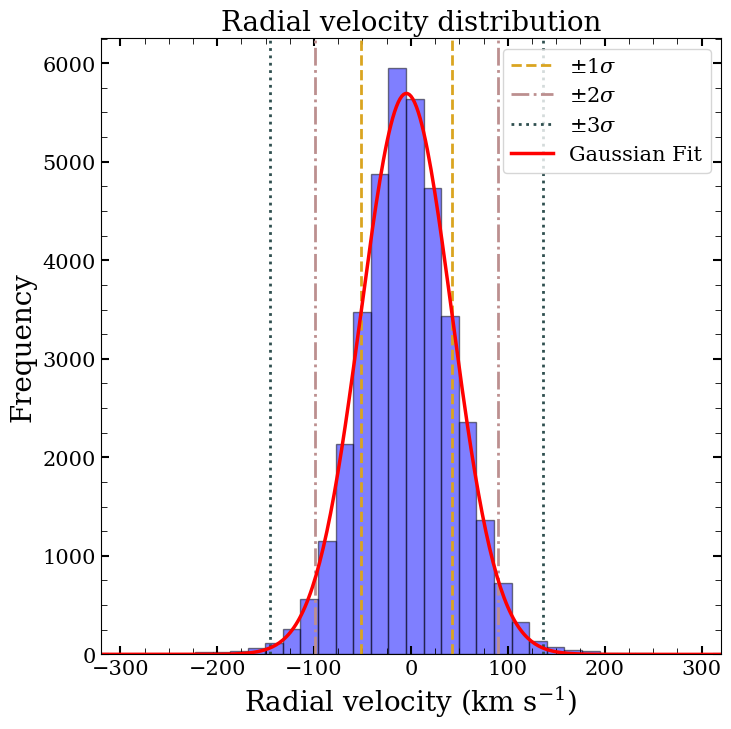

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(gaia_data['radial_velocity'], bins=50, color='blue', alpha=0.5, edgecolor='black')

params = gaussian_fit(gaia_data['radial_velocity'], 50)

sigma = params[2]
ax.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

ax.set_ylabel(r'Frequency', fontsize=20)
ax.set_xlabel(r"Radial velocity (km s$^{-1}$)", fontsize=20)
ax.set_title(r'Radial velocity distribution', fontsize=20)

ax.set_xlim(-320, 320)

ax.xaxis.set_minor_locator(MultipleLocator(25))
ax.yaxis.set_minor_locator(MultipleLocator(250))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)

Observando la distribución de velocidades radiales, notamos que ésta es prácticamente simétrica alrededor del 0. Esto es debido a que el sistema de referencia en el que se mide la velocidad radial está centrado prácticamente en el Sol, por lo que el comportamiento del sistema es similar al LSR. La misma cantidad de estrellas están "entrando" al sistema que las que están "saliendo", y a eso se debe la simetría en velocidades.

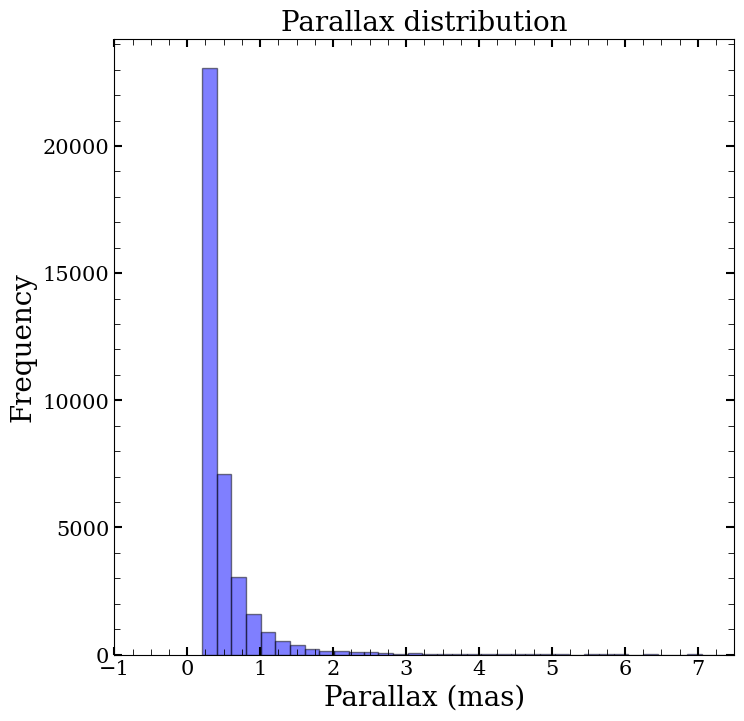

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(gaia_data['parallax'], bins=90, color='blue', alpha=0.5, edgecolor='black')

ax.set_ylabel(r'Frequency', fontsize=20)
ax.set_xlabel(r"Parallax (mas)", fontsize=20)
ax.set_title(r'Parallax distribution', fontsize=20)

ax.set_xlim(-1, 7.5)

ax.xaxis.set_minor_locator(MultipleLocator(0.25))
ax.yaxis.set_minor_locator(MultipleLocator(1000))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')


Dado que 1 mas es equivalente a una distancia de 1 kpc, notamos que nuestra muestra posee datos mayoritariamente con distancias de entre 1 a 4 kpc, donde un bajo porcentaje de la muestra es comprendida por estrellas más cercanas. Estrellas de menos de 1 kpc pueden ser consideradas como outliers.

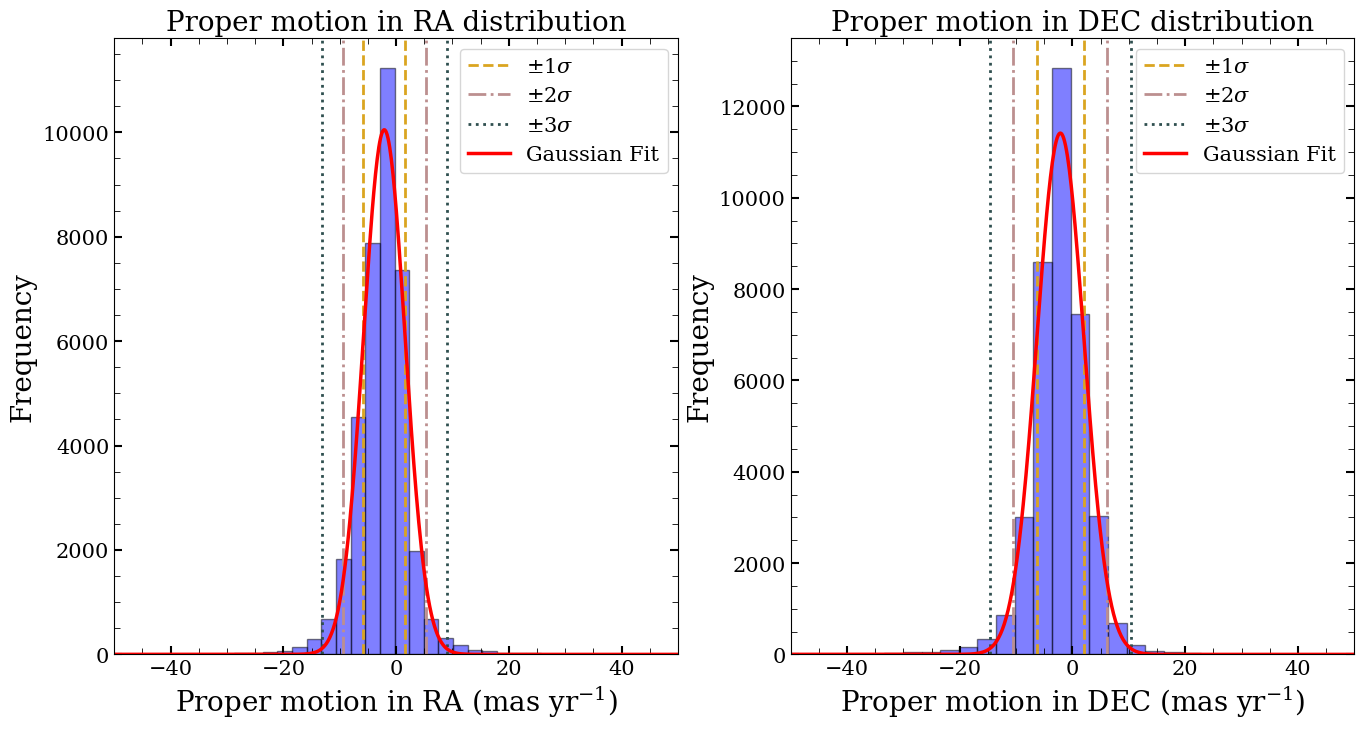

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.hist(gaia_data['pmra'], bins=80, color='blue', alpha=0.5, edgecolor='black')

ax1.set_ylabel(r'Frequency', fontsize=20)
ax1.set_xlabel(r"Proper motion in RA (mas yr$^{-1}$)", fontsize=20)
ax1.set_title(r'Proper motion in RA distribution', fontsize=20)

params = gaussian_fit(gaia_data['pmra'], 80)

sigma = params[2]
ax1.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax1.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax1.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax1.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax1.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax1.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax1.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.yaxis.set_minor_locator(MultipleLocator(500))

ax1.set_xlim(-50, 50)

ax1.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax1.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax1.grid(False, which='both')
ax1.legend(fontsize=15, markerscale=1)

ax2.hist(gaia_data['pmdec'], bins=80, color='blue', alpha=0.5, edgecolor='black')

ax2.set_ylabel(r'Frequency', fontsize=20)
ax2.set_xlabel(r"Proper motion in DEC (mas yr$^{-1}$)", fontsize=20)
ax2.set_title(r'Proper motion in DEC distribution', fontsize=20)

params = gaussian_fit(gaia_data['pmdec'], 80)

sigma = params[2]
ax2.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax2.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax2.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax2.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax2.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax2.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax2.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

ax2.xaxis.set_minor_locator(MultipleLocator(5))
ax2.yaxis.set_minor_locator(MultipleLocator(500))

ax2.set_xlim(-50, 50)

ax2.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax2.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax2.grid(False, which='both')
ax2.legend(fontsize=15, markerscale=1)

Ambas distribuciones de movimiento propio, tanto en RA como en DEC son prácticamente simétricas, centradas en 0. Esto es consistente con el hecho de que se está observando respecto a nuestro sistema de referencia, donde el movimiento promedio de las estrellas es nulo.

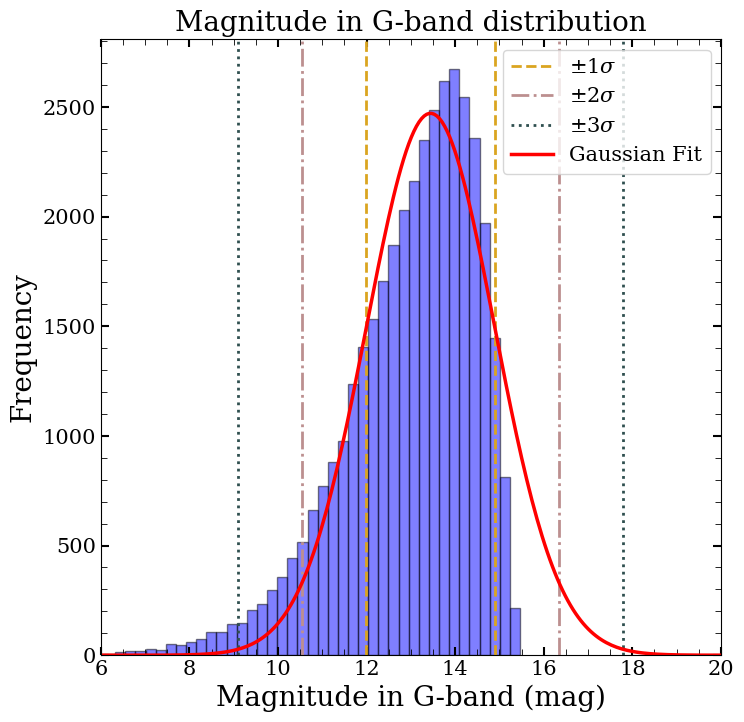

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(gaia_data['phot_g_mean_mag'], bins=50, color='blue', alpha=0.5, edgecolor='black')

params = gaussian_fit(gaia_data['phot_g_mean_mag'], 50)

sigma = params[2]
ax.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

ax.set_ylabel(r'Frequency', fontsize=20)
ax.set_xlabel(r"Magnitude in G-band (mag)", fontsize=20)
ax.set_title(r'Magnitude in G-band distribution', fontsize=20)

ax.set_xlim(6, 20)

ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(100))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)

La mayoría de nuestros datos poseen magnitudes aparentes entre 10 y 15 mag.

### c)

In [15]:
# Definimos primero las coordenadas baricentricas 
# para cada uno de los objetos en el dataframe:

ra = np.array(gaia_data['ra']) * u.deg
dec = np.array(gaia_data['dec']) * u.deg
dist = (np.array(gaia_data['parallax']) * u.mas).to(u.pc, u.parallax())
pmra = np.array(gaia_data['pmra']) * u.mas/u.yr
pmdec = np.array(gaia_data['pmdec']) * u.mas/u.yr
rv = np.array(gaia_data['radial_velocity']) * u.km/u.s

icrs_coord_data = coord.SkyCoord(
    ra=ra,
    dec=dec,
    distance=dist,
    pm_ra_cosdec=pmra,
    pm_dec=pmdec,
    radial_velocity=rv,
    frame='icrs'
)

# Ahora, transformamos las coordenadas a galactocéntricas
galactocentric_coord_data = icrs_coord_data.transform_to(coord.Galactocentric)

In [16]:
# Guardamos las coordenadas de posición y velocidad en variables

gal_x = np.array(galactocentric_coord_data.x.to(u.kpc))
gal_y = np.array(galactocentric_coord_data.y.to(u.kpc))
gal_z = np.array(galactocentric_coord_data.z.to(u.kpc))

gal_vx = np.array(galactocentric_coord_data.v_x)
gal_vy = np.array(galactocentric_coord_data.v_y)
gal_vz = np.array(galactocentric_coord_data.v_z)

Graficamos la distribución de posiciones en X, Y y Z.

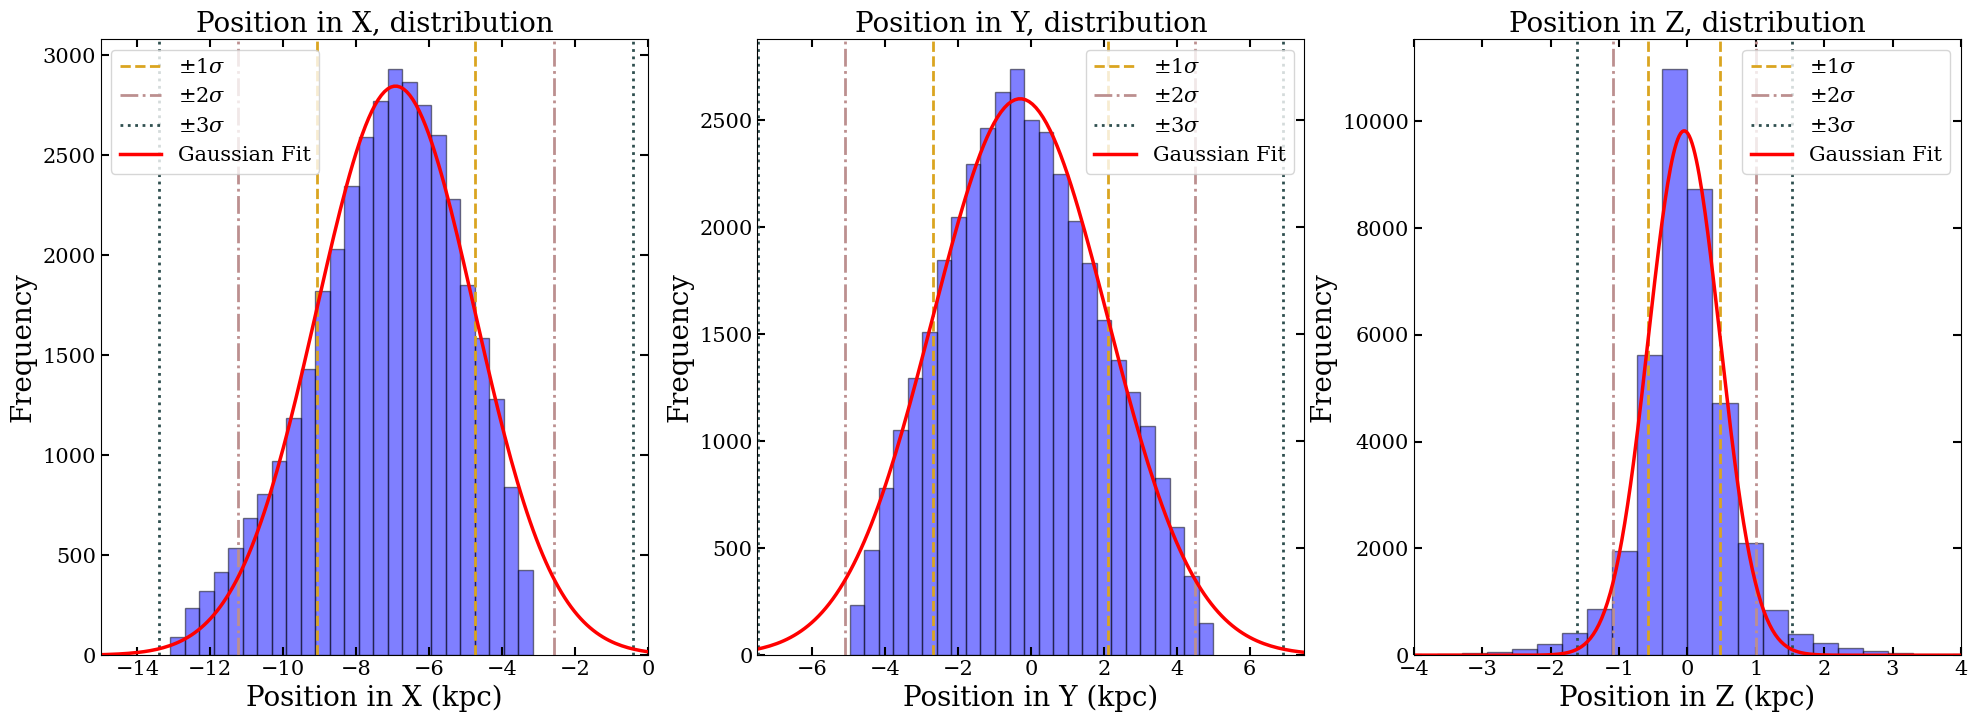

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
ax1.hist(gal_x, bins=25, color='blue', alpha=0.5, edgecolor='black')

ax1.set_ylabel(r'Frequency', fontsize=20)
ax1.set_xlabel(r"Position in X (kpc)", fontsize=20)
ax1.set_title(r'Position in X, distribution', fontsize=20)

params = gaussian_fit(gal_x, 25)

sigma = params[2]
ax1.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax1.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax1.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax1.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax1.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax1.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax1.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

# ax1.xaxis.set_minor_locator(MultipleLocator(5))
# ax1.yaxis.set_minor_locator(MultipleLocator(500))

ax1.set_xlim(-15, 0)

ax1.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax1.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax1.grid(False, which='both')
ax1.legend(fontsize=15, markerscale=1)

ax2.hist(gal_y, bins=25, color='blue', alpha=0.5, edgecolor='black')

ax2.set_ylabel(r'Frequency', fontsize=20)
ax2.set_xlabel(r"Position in Y (kpc)", fontsize=20)
ax2.set_title(r'Position in Y, distribution', fontsize=20)

params = gaussian_fit(gal_y, 25)

sigma = params[2]
ax2.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax2.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax2.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax2.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax2.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax2.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax2.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

# ax2.xaxis.set_minor_locator(MultipleLocator(5))
# ax2.yaxis.set_minor_locator(MultipleLocator(500))

ax2.set_xlim(-7.5, 7.5)

ax2.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax2.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax2.grid(False, which='both')
ax2.legend(fontsize=15, markerscale=1)

ax3.hist(gal_z, bins=25, color='blue', alpha=0.5, edgecolor='black')

ax3.set_ylabel(r'Frequency', fontsize=20)
ax3.set_xlabel(r"Position in Z (kpc)", fontsize=20)
ax3.set_title(r'Position in Z, distribution', fontsize=20)

params = gaussian_fit(gal_z, 25)

sigma = params[2]
ax3.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax3.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax3.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax3.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax3.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax3.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax3.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

# ax3.xaxis.set_minor_locator(MultipleLocator(5))
# ax3.yaxis.set_minor_locator(MultipleLocator(500))

ax3.set_xlim(-4, 4)

ax3.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax3.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax3.grid(False, which='both')
ax3.legend(fontsize=15, markerscale=1)

Tanto las posiciones de los objetos en Y como en Z presentan distribuciones simétricas centradas en 0, ya que se observan la misma cantidad de objetos en la posición vertical y tangencial. Sin embargo, notamos que la distribución de posiciones en el eje X es distinta. En coordenadas galactocéntricas, el eje X tiene como origen el centro galáctico y pasa por el Sol. Tomando que el Sol se encuentra cerca de la coordenada -8 kpc respecto del centro galáctico, notamos que hay una mayor densidad de datos hacia dentro del disco que hacia afuera.

Ahora graficamos las velocidades respecto a X, Y y Z.

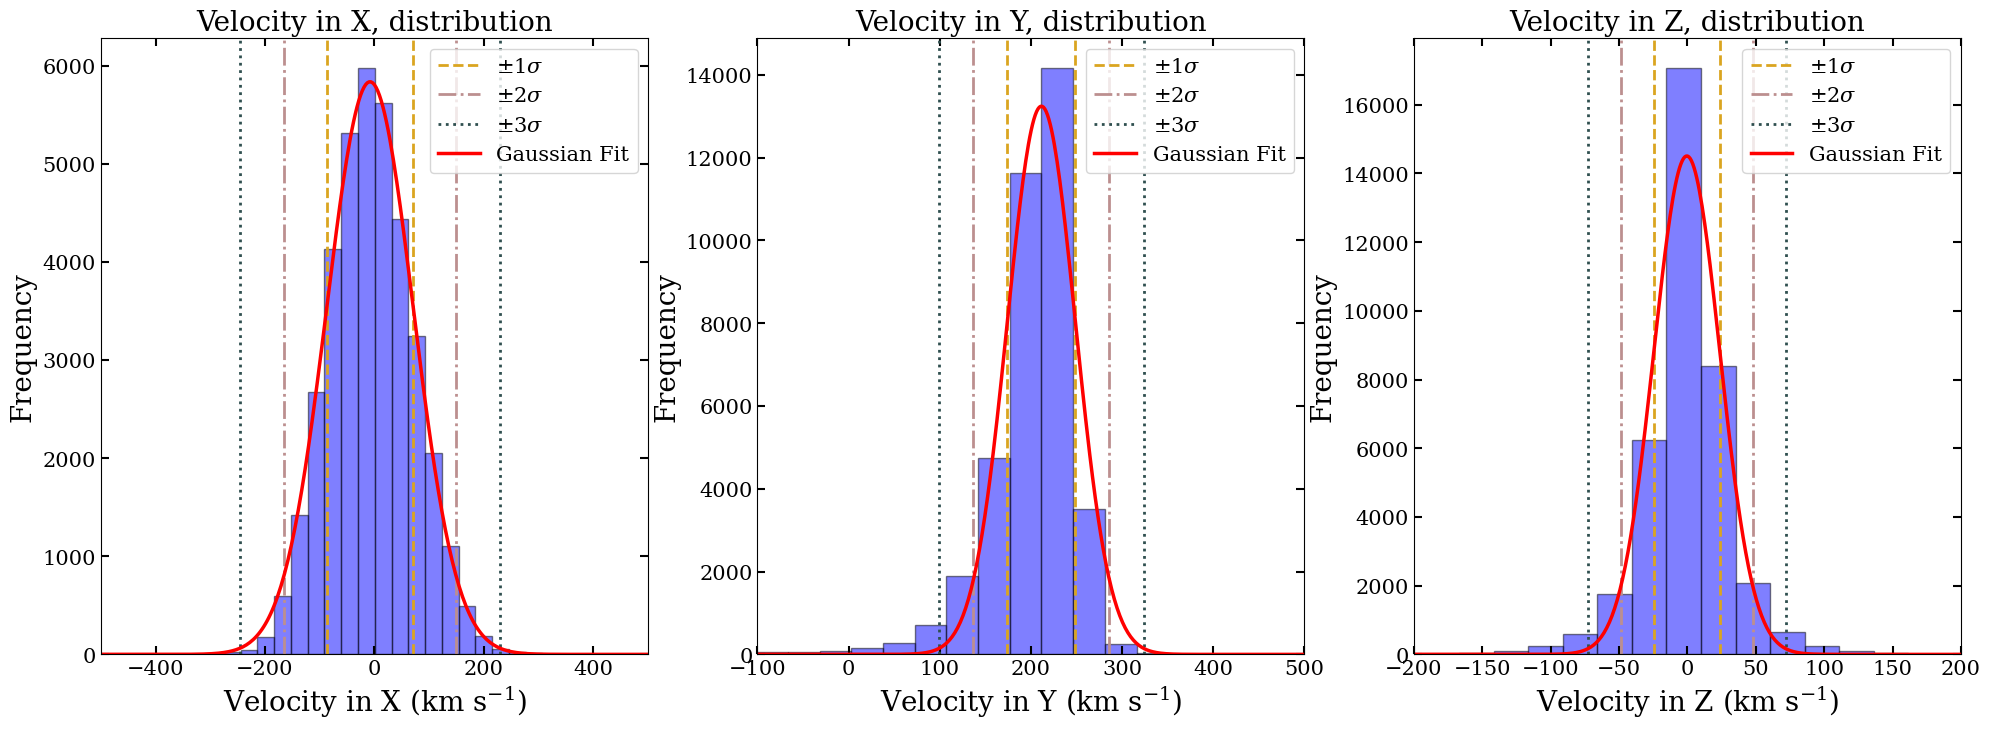

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))
ax1.hist(gal_vx, bins=25, color='blue', alpha=0.5, edgecolor='black')

ax1.set_ylabel(r'Frequency', fontsize=20)
ax1.set_xlabel(r"Velocity in X (km s$^{-1}$)", fontsize=20)
ax1.set_title(r'Velocity in X, distribution', fontsize=20)

params = gaussian_fit(gal_vx, 25)

sigma = params[2]
ax1.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax1.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax1.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax1.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax1.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax1.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax1.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

# ax1.xaxis.set_minor_locator(MultipleLocator(5))
# ax1.yaxis.set_minor_locator(MultipleLocator(500))

ax1.set_xlim(-500, 500)

ax1.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax1.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax1.grid(False, which='both')
ax1.legend(fontsize=15, markerscale=1)

ax2.hist(gal_vy, bins=25, color='blue', alpha=0.5, edgecolor='black')

ax2.set_ylabel(r'Frequency', fontsize=20)
ax2.set_xlabel(r"Velocity in Y (km s$^{-1}$)", fontsize=20)
ax2.set_title(r'Velocity in Y, distribution', fontsize=20)

params = gaussian_fit(gal_vy, 25)

sigma = params[2]
ax2.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax2.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax2.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax2.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax2.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax2.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax2.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

# ax2.xaxis.set_minor_locator(MultipleLocator(5))
# ax2.yaxis.set_minor_locator(MultipleLocator(500))

ax2.set_xlim(-100, 500)

ax2.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax2.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax2.grid(False, which='both')
ax2.legend(fontsize=15, markerscale=1)

ax3.hist(gal_vz, bins=25, color='blue', alpha=0.5, edgecolor='black')

ax3.set_ylabel(r'Frequency', fontsize=20)
ax3.set_xlabel(r"Velocity in Z (km s$^{-1}$)", fontsize=20)
ax3.set_title(r'Velocity in Z, distribution', fontsize=20)

params = gaussian_fit(gal_vz, 25)

sigma = params[2]
ax3.axvline(params[1] + sigma, color='goldenrod', linestyle='--', label=r'$\pm 1 \sigma$', linewidth=2)
ax3.axvline(params[1] - sigma, color='goldenrod', linestyle='--', linewidth=2)
ax3.axvline(params[1] + 2*sigma, color='rosybrown', linestyle='-.', label=r'$\pm 2 \sigma$', linewidth=2)
ax3.axvline(params[1] - 2*sigma, color='rosybrown', linestyle='-.', linewidth=2)
ax3.axvline(params[1] + 3*sigma, color='darkslategray', linestyle=':', label=r'$\pm 3 \sigma$', linewidth=2)
ax3.axvline(params[1] - 3*sigma, color='darkslategray', linestyle=':', linewidth=2)

x_linspace = np.linspace(params[1] - 20*sigma, params[1] + 20*sigma, 1000) 

ax3.plot(x_linspace, gaussian(x_linspace, *params), color='red', label='Gaussian Fit', linewidth=2.5)

# ax3.xaxis.set_minor_locator(MultipleLocator(5))
# ax3.yaxis.set_minor_locator(MultipleLocator(500))

ax3.set_xlim(-200, 200)

ax3.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax3.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax3.grid(False, which='both')
ax3.legend(fontsize=15, markerscale=1)

Observamos que las distribuciones de velocidad son simétricas y centradas en 0 para el eje X y para el eje Z. Esto es, con respecto al centro galáctico, en el eje X hay la misma cantidad de estrellas "saliendo" de la trayectoria del sol que entrando, y pasa lo mismo en la coordenada Z. En Y, dado que esta coordenada es perpendicular a la definida respecto al Sol, esta describe una velocidad tangencial, y coincide que la distribución está centrada cerca de ~220 km/s, la velocidad con la que se mueve el LSR con respecto al centro galáctico.

Para obtener un sistema cilíndrico, definiremos la coordenada $R$:

$$R = (X^{2} + Y^{2})^{1/2}$$

In [19]:
gal_r = np.sqrt(gal_x**2 + gal_y**2)

Hacemos un scatter plot de $R$ versus $Z$:

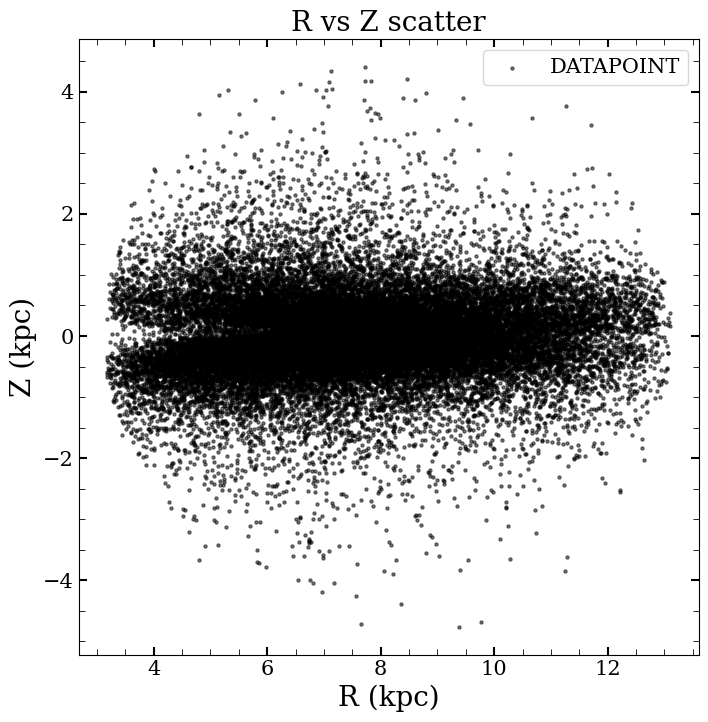

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(gal_r, gal_z, label=r'DATAPOINT', s=5, color='black', alpha=0.5)

ax.set_ylabel(r'Z (kpc)', fontsize=20)
ax.set_xlabel(r"R (kpc)", fontsize=20)
ax.set_title(r'R vs Z scatter', fontsize=20)


ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)

La forma en que podemos interpretar este gráfico es como que estuvieramos observando una región del disco galáctico con la galaxia edge-on. Vemos que a medida que nos acercamos al centro galáctico (Z = 0, menor R), hay menos densidad de datos, lo cual es consistente con que la muestra es principalmente del disco galáctico y no contiene datos del bulbo.

### d)

Según la tabla, (interpretando [Fe/H] como [M/H] en nuestros datos), las metalicidades presentes en el *thick disk* van entre -0.5 y -2.2, y las presentes en el *thin disk* van entre -0.5 a 0.3. Utilizando estos datos, podemos filtrar nuestros datos por metalicidad, para separar las estrellas del *thin disk* a las del *thick disk*.

In [21]:
# borrar los NaNs de la columna mh_gspspec
gaia_data_nn = gaia_data.dropna(subset=['mh_gspspec'])

In [22]:
thin_disk_data = gaia_data[
    (gaia_data_nn['mh_gspspec'] > -0.5) & (gaia_data['mh_gspspec'] <= 0.3)
]

thick_disk_data = gaia_data[
    (gaia_data_nn['mh_gspspec'] <= -0.5) & (gaia_data['mh_gspspec'] > -2.2)
]

Definimos las coordenadas galactocéntricas y la coordenada R:

In [23]:
# Definimos primero las coordenadas baricentricas 
# para cada uno de los objetos en el dataframe:

ra_thin = np.array(thin_disk_data['ra']) * u.deg
dec_thin = np.array(thin_disk_data['dec']) * u.deg
dist_thin = (np.array(thin_disk_data['parallax']) * u.mas).to(u.pc, u.parallax())
pmra_thin = np.array(thin_disk_data['pmra']) * u.mas/u.yr
pmdec_thin = np.array(thin_disk_data['pmdec']) * u.mas/u.yr
rv_thin = np.array(thin_disk_data['radial_velocity']) * u.km/u.s

ra_thick = np.array(thick_disk_data['ra']) * u.deg
dec_thick = np.array(thick_disk_data['dec']) * u.deg
dist_thick = (np.array(thick_disk_data['parallax']) * u.mas).to(u.pc, u.parallax())
pmra_thick = np.array(thick_disk_data['pmra']) * u.mas/u.yr
pmdec_thick = np.array(thick_disk_data['pmdec']) * u.mas/u.yr
rv_thick = np.array(thick_disk_data['radial_velocity']) * u.km/u.s

icrs_coord_data_thin = coord.SkyCoord(
    ra=ra_thin,
    dec=dec_thin,
    distance=dist_thin,
    pm_ra_cosdec=pmra_thin,
    pm_dec=pmdec_thin,
    radial_velocity=rv_thin,
    frame='icrs'
)

icrs_coord_data_thick = coord.SkyCoord(
    ra=ra_thick,
    dec=dec_thick,
    distance=dist_thick,
    pm_ra_cosdec=pmra_thick,
    pm_dec=pmdec_thick,
    radial_velocity=rv_thick,
    frame='icrs'
)

# Ahora, transformamos las coordenadas a galactocéntricas
galactocentric_coord_data_thin = icrs_coord_data_thin.transform_to(coord.Galactocentric)
galactocentric_coord_data_thick = icrs_coord_data_thick.transform_to(coord.Galactocentric)

In [24]:
thin_x = np.array(galactocentric_coord_data_thin.x.to(u.kpc))
thin_y = np.array(galactocentric_coord_data_thin.y.to(u.kpc))
thin_z = np.array(galactocentric_coord_data_thin.z.to(u.kpc))
thin_r = np.sqrt(thin_x**2 + thin_y**2)


thick_x = np.array(galactocentric_coord_data_thick.x.to(u.kpc))
thick_y = np.array(galactocentric_coord_data_thick.y.to(u.kpc))
thick_z = np.array(galactocentric_coord_data_thick.z.to(u.kpc))
thick_r = np.sqrt(thick_x**2 + thick_y**2)

Hacemos un scatter de R y Z del thick y thin disk:

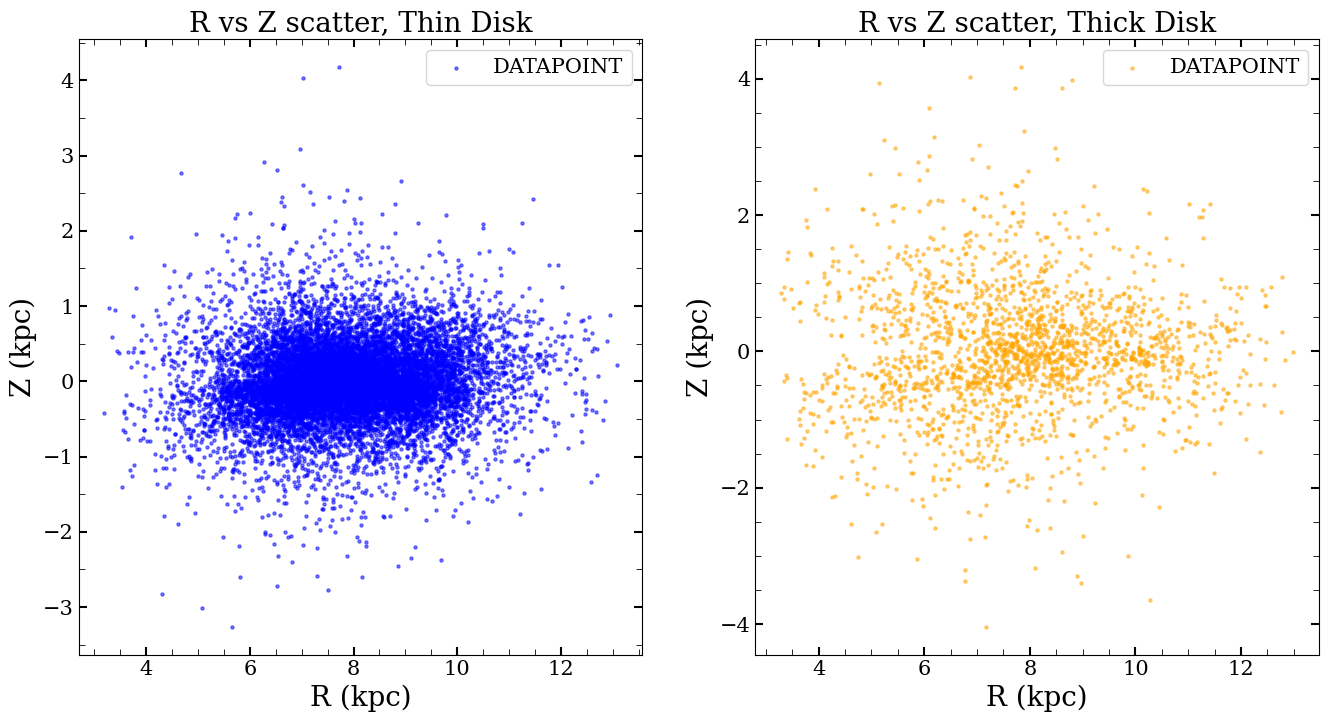

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.scatter(thin_r, thin_z, label=r'DATAPOINT', s=5, alpha=0.5, c='b')

ax1.set_ylabel(r'Z (kpc)', fontsize=20)
ax1.set_xlabel(r"R (kpc)", fontsize=20)
ax1.set_title(r'R vs Z scatter, Thin Disk', fontsize=20)


ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))

ax1.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax1.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax1.grid(False, which='both')
ax1.legend(fontsize=15, markerscale=1)

ax2.scatter(thick_r, thick_z, label=r'DATAPOINT', s=5, alpha=0.5, c='orange')

ax2.set_ylabel(r'Z (kpc)', fontsize=20)
ax2.set_xlabel(r"R (kpc)", fontsize=20)
ax2.set_title(r'R vs Z scatter, Thick Disk', fontsize=20)


ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(0.5))

ax2.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax2.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax2.grid(False, which='both')
ax2.legend(fontsize=15, markerscale=1)

### e)

Haremos un histograma utilizando np.arange, con bins de 0.01 kpc (10 pc):

In [26]:
z_bins = np.arange(-4, 4, 0.01)

thin_z_hist, _ = np.histogram(thin_z, bins=z_bins)
thick_z_hist, _ = np.histogram(thick_z, bins=z_bins)

In [27]:
z_bins.shape

(800,)

In [28]:
print(thin_z_hist.shape, thick_z_hist.shape)

(799,) (799,)


Calcularemos el centro de los bins para graficar:

In [29]:
z_bin_centers = (z_bins[:-1] + z_bins[1:]) / 2
z_bin_centers.shape

(799,)

Hacemos un scatter plot del número de estrellas por bin en función de la coordenada Z:

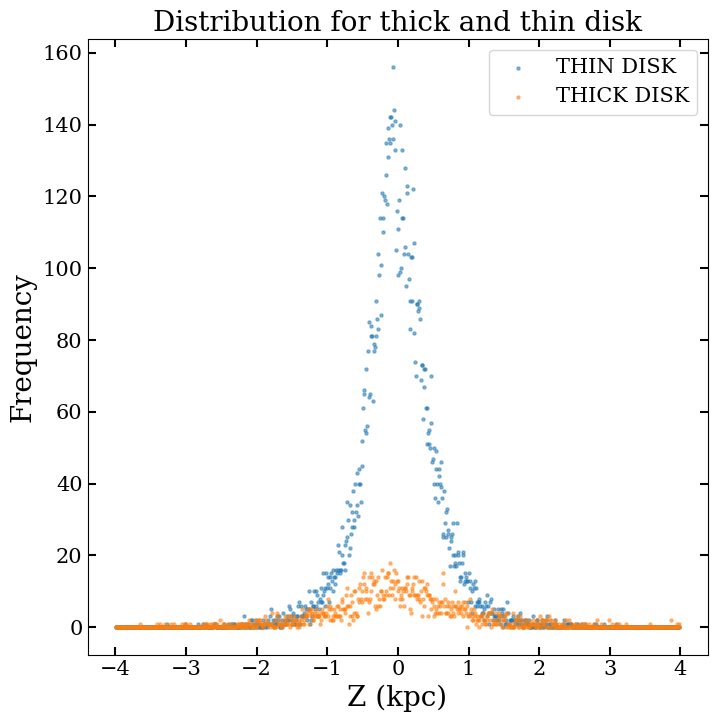

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(z_bin_centers, thin_z_hist, label=r'THIN DISK', s=5, alpha=0.5)
ax.scatter(z_bin_centers, thick_z_hist, label=r'THICK DISK', s=5, alpha=0.5)

ax.set_ylabel(r'Frequency', fontsize=20)
ax.set_xlabel(r"Z (kpc)", fontsize=20)
ax.set_title(r'Distribution for thick and thin disk', fontsize=20)


# ax.xaxis.set_minor_locator(MultipleLocator(0.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)

Asumiendo que este comportamiento es simétrico, podemos tomar el valor absoluto de las alturas Z:

In [49]:
abs_zbin_centers = np.abs(z_bin_centers)

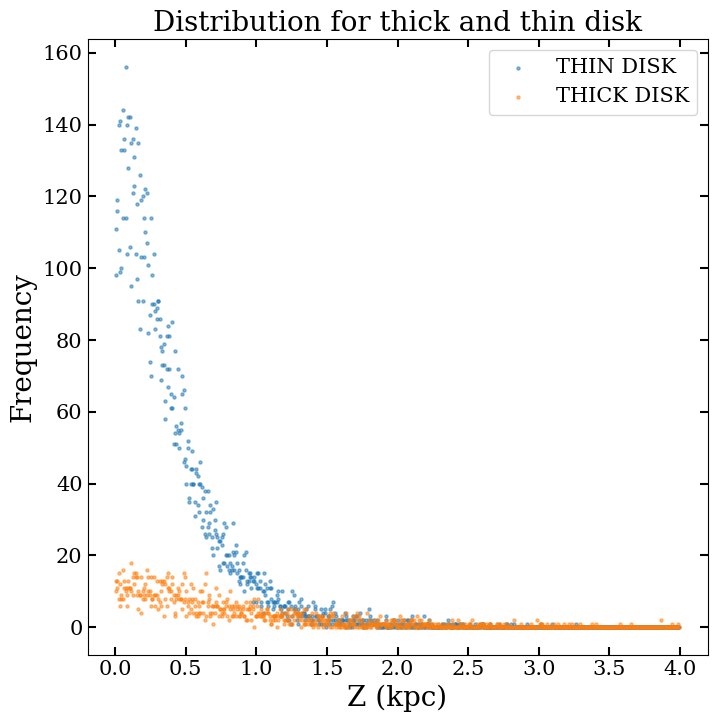

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(abs_zbin_centers, thin_z_hist, label=r'THIN DISK', s=5, alpha=0.5)
ax.scatter(abs_zbin_centers, thick_z_hist, label=r'THICK DISK', s=5, alpha=0.5)

ax.set_ylabel(r'Frequency', fontsize=20)
ax.set_xlabel(r"Z (kpc)", fontsize=20)
ax.set_title(r'Distribution for thick and thin disk', fontsize=20)


# ax.xaxis.set_minor_locator(MultipleLocator(0.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)

Notamos un aumento brusco en la densidad de estrellas en el thin disk en alturas más cercanas al plano de la galaxia, en comparación al leve aumento observado en el thick disk.

### f)

Ajustaremos una función exponencial de la forma

$$f(z) = Ae^{-z/z_h} + C$$

In [56]:
def exp_law(z_data, A, z_h, C):
    return A * np.exp(-z_data/z_h) + C

In [57]:
thin_popt, thin_pcov = curve_fit(exp_law, abs_zbin_centers, thin_z_hist, p0=[1, 0.35, 1])
thick_popt, thick_pcov = curve_fit(exp_law, abs_zbin_centers, thick_z_hist, p0=[1, 1, 1])

thin_perr = np.sqrt(np.diag(thin_pcov))
thick_perr = np.sqrt(np.diag(thick_pcov))

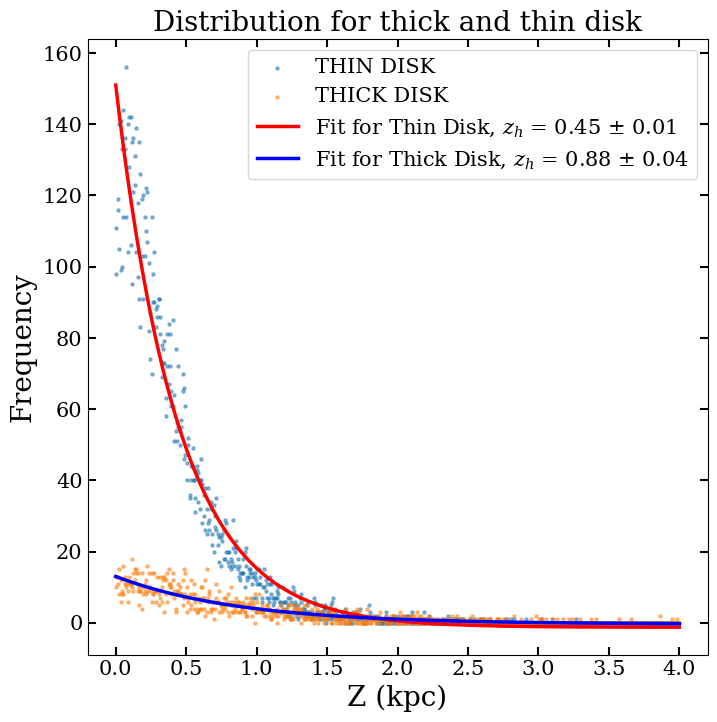

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(abs_zbin_centers, thin_z_hist, label=r'THIN DISK', s=5, alpha=0.5)
ax.scatter(abs_zbin_centers, thick_z_hist, label=r'THICK DISK', s=5, alpha=0.5)

x_linspace = np.linspace(0, 4, 1000)

ax.plot(x_linspace, exp_law(x_linspace, *thin_popt), color='red', 
        label=r'Fit for Thin Disk, $z_h$ = {} $\pm$ {}'.format(round(thin_popt[1], 2), round(thin_perr[1], 2)), linewidth=2.5)
ax.plot(x_linspace, exp_law(x_linspace, *thick_popt), color='blue',
        label=r'Fit for Thick Disk, $z_h$ = {} $\pm$ {}'.format(round(thick_popt[1], 2), round(thick_perr[1], 2)), linewidth=2.5)


ax.set_ylabel(r'Frequency', fontsize=20)
ax.set_xlabel(r"Z (kpc)", fontsize=20)
ax.set_title(r'Distribution for thick and thin disk', fontsize=20)


# ax.xaxis.set_minor_locator(MultipleLocator(0.5))
# ax.yaxis.set_minor_locator(MultipleLocator(0.5))

ax.tick_params(axis='both', labelsize=15, direction='in', right=True, top=True,
                length=6, width=1.5, grid_color='black', grid_alpha=1, grid_linestyle="-",
                grid_linewidth=0.5)

ax.tick_params(which='minor', length=4, color='black', direction='in', top=True, right=True,
                grid_alpha=0.2, grid_linewidth=0.5, grid_linestyle="-",grid_color='r')


ax.grid(False, which='both')
ax.legend(fontsize=15, markerscale=1)

Valores de tabla:

- $z_{h} = 0.35$ kpc para el thin disk
- $z_{h} = 1$ kpc para el thick disk

Los valores obtenidos para los $z_h$ son muy similares a los publicados en la tabla. Las diferencias pueden deberse principalmente a la manera en que ajustamos nuestros datos, ya que utilizamos curve_fit para ajustar tres parámetros dentro de la función que definimos.

### g)

In [77]:
thin_vz = np.array(galactocentric_coord_data_thin.v_z)
thick_vz = np.array(galactocentric_coord_data_thick.v_z)

std_thin_vz = round(np.std(thin_vz), 2)
std_thick_vz = round(np.std(thick_vz), 2)

print(r'Distribución de velocidades en Z para el Thin Disk: {} km/s'.format(
    std_thin_vz
))
print(r"Distribución de velocidades en Z para el Thick Disk: {} km/s".format(
    std_thick_vz
))

Distribución de velocidades en Z para el Thin Disk: 23.25 km/s
Distribución de velocidades en Z para el Thick Disk: 44.64 km/s


Valores de tabla:

- $\sigma_{w} = 16$ para Thin Disk
- $\sigma_{w} = 35$ para Thick Disk

Nuestras distribuciones de velocidades en Z difieren en alrededor de $7 ~ 10 km/s$, sin embargo es consistente con que las distribuciones son mayores en el thick disk que en el thin disk.